# Data Cleaning

The purpose of this notebook is to clean our dataset so that it can be used for analysis and model building subsequently.
More specifically, in this notebook we try to reduce the class imbalance of our dataset so that our trained model can identify the minority class better.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Read in the raw dataset
df_raw = pd.read_csv('data_interview_test.csv', delimiter = ":")
df_raw.head(20)

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
0,"10,000",10000,"10,468","10,000",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,"10,000",10000,"10,468","10,001",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,"10,000",10000,"10,468","10,003",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,"10,000",10000,"10,468","10,004",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,"10,000",10000,"10,468","10,005",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,"10,000",10000,"10,468","10,006",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,"10,000",10000,"10,468","10,008",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,"10,000",10000,"10,468","10,009",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,"10,000",10000,"10,468","10,010",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,"10,000",10000,"10,468","10,011",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
# Only display the rows for which there is a match
df_matched = df_raw[df_raw['matched_transaction_id']==df_raw["feature_transaction_id"]]
df_matched.head(10)

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
25,"10,001",10000,"10,605","10,605",0.90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27,"10,002",10000,"10,286","10,286",0.95,0.0,0.0,1.0,0.0,0.8,0.0,0.0,0.0,0.0
38,"10,003",10000,"10,412","10,412",0.85,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
73,"10,005",10000,"10,474","10,474",0.90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
105,"10,007",10000,"10,360","10,360",0.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
138,"10,009",10000,"10,484","10,484",0.95,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
153,"10,010",10000,"10,405","10,405",0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
170,"10,011",10000,"10,659","10,659",0.95,0.0,0.0,1.0,0.0,0.6,0.0,0.0,0.0,1.0
173,"10,012",10000,"10,256","10,256",0.85,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
207,"10,014",10000,"10,650","10,650",0.85,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
# Define Target/ Response which we would try to model as a function of the matching vector variables
df_raw['is_match'] = [1 if df_raw.loc[i,'matched_transaction_id'] == df_raw.loc[i,'feature_transaction_id'] else 0 for i in range(0,len(df_raw))]
df_raw.sample(10)

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,is_match
5016,"30,027",30000,"30,392","30,381",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7745,"30,241",30000,"30,438","30,003",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3616,"20,117",20000,"20,272","20,272",0.95,0.0,0.0,1.0,0.0,0.8,1.0,0.0,0.0,0.0,1
1647,"10,150",10000,"10,308","10,028",0.00,0.4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7748,"30,241",30000,"30,438","30,047",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6360,"30,131",30000,"30,914","30,159",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5751,"30,083",30000,"31,247","31,246",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
134,"10,009",10000,"10,484","10,478",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
47,"10,004",10000,"10,413","10,006",0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
11426,"50,127",50000,"50,122","50,026",0.00,0.0,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


## Class Imbalance in the Original Dataset

Lets calculate the percentage of Match v/s Non-Match transactions available in the raw dataset

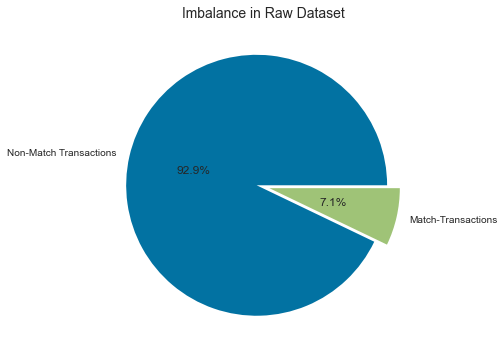

In [36]:
percentage_of_matches = (df_raw.is_match.value_counts()[1]*100)/len(df_raw)
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = ["Non-Match Transactions","Match-Transactions"]
plt.pie(x=[(100-percentage_of_matches),percentage_of_matches], autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Imbalance in Raw Dataset", fontsize=14);
pie.savefig("RawDataImblancePie.png",dpi=300)

In [37]:
df_training = df_raw.drop(["receipt_id","company_id","matched_transaction_id","feature_transaction_id"],axis=1)
df_training.head(10)

,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,is_match
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [15]:
#for col in df_training.columns:
 #   print(col)
  #  print(df_training[col].value_counts())

# Data Cleaning

Since every receipt was not matched with every transaction for the member, we need to remove these entries from our training dataset in order to prevent mis-training of the ML model.

For instance, as per the example given in the problem statement

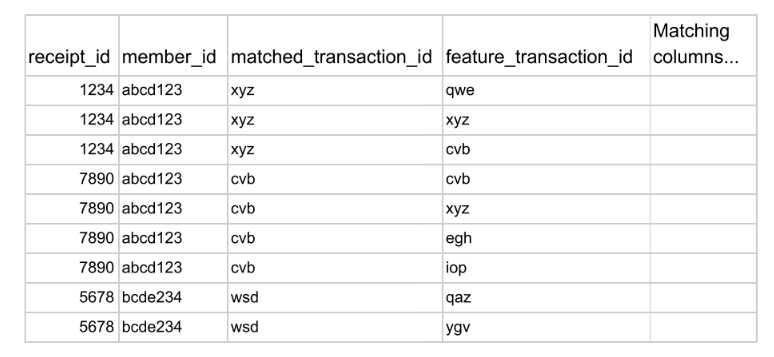

We would need to remove all entries for the *member_id* **bcde234** because of no matches.

In [38]:
df_no_matches = df_raw.groupby(by="receipt_id")['is_match'].max().reset_index()
df_no_matches.columns= ["receipt_id",'max(is_match)']

In [39]:
# Store the receipt ids without matches in a separate list
receipt_ids_with_no_matches = df_no_matches.loc[df_no_matches['max(is_match)']==0,"receipt_id"]
print(receipt_ids_with_no_matches)

0       10,000
4       10,004
6       10,006
8       10,008
13      10,013
         ...  
1140    50,211
1141    50,212
1142    50,213
1146    50,218
1153    50,225
Name: receipt_id, Length: 298, dtype: object


In [40]:
a = len(receipt_ids_with_no_matches)
b = len(df_raw.receipt_id.unique())
percentage_of_unmatched_receipts = a*100/b
print("The percentage of unmatched receipts present in the dataset are: ",round(percentage_of_unmatched_receipts,2))

The percentage of unmatched receipts present in the dataset are:  25.8


**Over 1/4th of the receipts present in the raw dataset don't have a match!**

## Class Imbalance in the Cleaned Dataset

Lets calculate the percentage of Match v/s Non-Match transactions available in the cleaned dataset

In [41]:
# removed all entries corrusponding to unmatched receipts from the dataset and store it inside a new cleaned dataset
df_cleaned = df_raw[~df_raw.receipt_id.isin(receipt_ids_with_no_matches)]

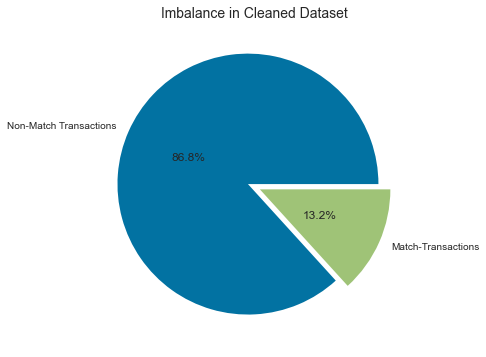

In [43]:
percentage_of_matches = (df_cleaned.is_match.value_counts()[1]*100)/len(df_cleaned)
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = ["Non-Match Transactions","Match-Transactions"]
plt.pie(x=[(100-percentage_of_matches),percentage_of_matches], autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Imbalance in Cleaned Dataset", fontsize=14);
pie.savefig("CleanedDataImblancePie.png",dpi=300)

To make a better comparison, lets see the 2 pie charts side by side.

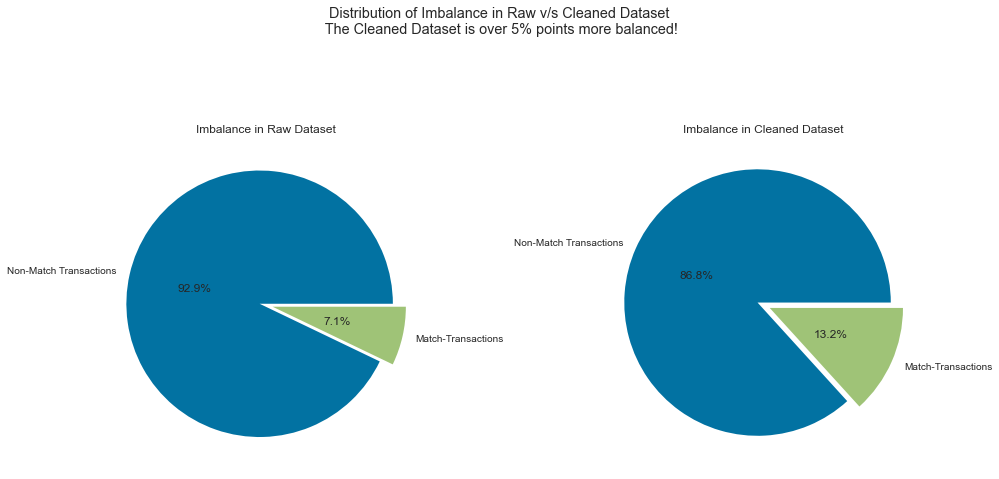

In [59]:
percentage_of_matches_1 = (df_raw.is_match.value_counts()[1]*100)/len(df_raw)
#Using matplotlib
pie, ax = plt.subplots(1,2,figsize=[14,8])
labels = ["Non-Match Transactions","Match-Transactions"]
ax[0].pie(x=[(100-percentage_of_matches_1),percentage_of_matches_1], autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)

ax[0].title.set_text("Imbalance in Raw Dataset");
#ax[0].title("Imbalance in Raw Dataset", fontsize=14);

percentage_of_matches_2 = (df_cleaned.is_match.value_counts()[1]*100)/len(df_cleaned)
ax[1].pie(x=[(100-percentage_of_matches_2),percentage_of_matches_2], autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
ax[1].title.set_text("Imbalance in Cleaned Dataset")
pie.suptitle("Distribution of Imbalance in Raw v/s Cleaned Dataset\n The Cleaned Dataset is over 5% points more balanced!")
pie.tight_layout()
#ax[1].title("Imbalance in Cleaned Dataset", fontsize=14);
pie.savefig("Imbalance_Comparison.png",dpi=300)

In [43]:
# Store the cleaned dataset in a new csv file to be used later on while training models
df_cleaned.to_csv("df_cleaned.csv")

(6468, 15)